In [1]:
import cv2
import numpy as np
from superpoint.datasets.warm_separated import WarmSeparated
from utils import plot_imgs

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
experiments = [
    'magic-point_warm_separated-export',
    'magic-point_warm_separated-export_lower_threshold', 
    'magic-point_warm_separated-export_lower_threshold_top_k'
]
names = ['Threshold 0.15', 'Threshold 0.001', 'Threshold 0.001 - Top 300']
num_print = 10

In [5]:
configs = [{'labels': 'outputs/{}'.format(e), 'truncate': 10000} for e in experiments]
print(configs)
datasets = [WarmSeparated(**c).get_test_set() for c in configs]
print(datasets)

[{'labels': 'outputs/magic-point_warm_separated-export', 'truncate': 10000}, {'labels': 'outputs/magic-point_warm_separated-export_lower_threshold', 'truncate': 10000}, {'labels': 'outputs/magic-point_warm_separated-export_lower_threshold_top_k', 'truncate': 10000}]
[<generator object BaseDataset._get_set_generator at 0x2aaf67112e08>, <generator object BaseDataset._get_set_generator at 0x2aaf69122c50>, <generator object BaseDataset._get_set_generator at 0x2aaf671db410>]


In [6]:
def draw_keypoints(img, corners, color=(0, 255, 0), radius=3, s=3):
    img = np.repeat(cv2.resize(img, None, fx=s, fy=s)[..., np.newaxis], 3, -1)
    for c in np.stack(corners).T:
        cv2.circle(img, tuple(s*np.flip(c, 0)), radius, color, thickness=-1)
    return img

b'4_1_ir'
b'4_1_ir'
b'4_1_ir'
b'4_1_opt'
b'4_1_opt'
b'4_1_opt'


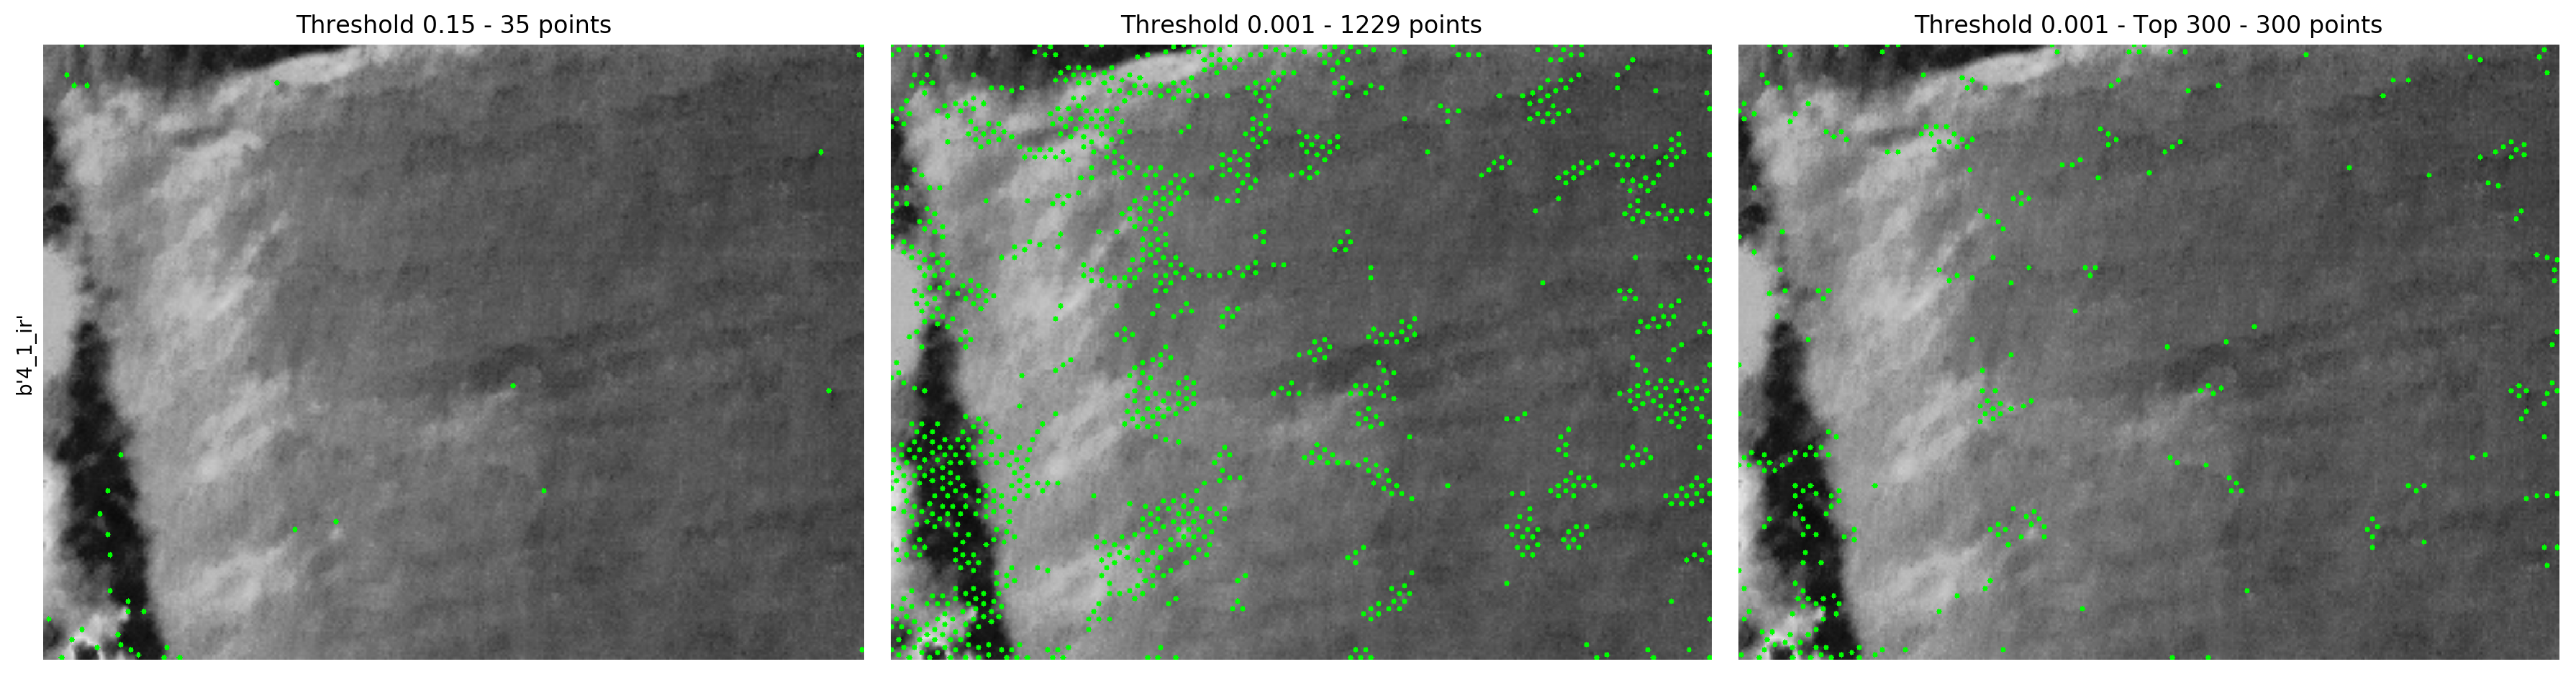

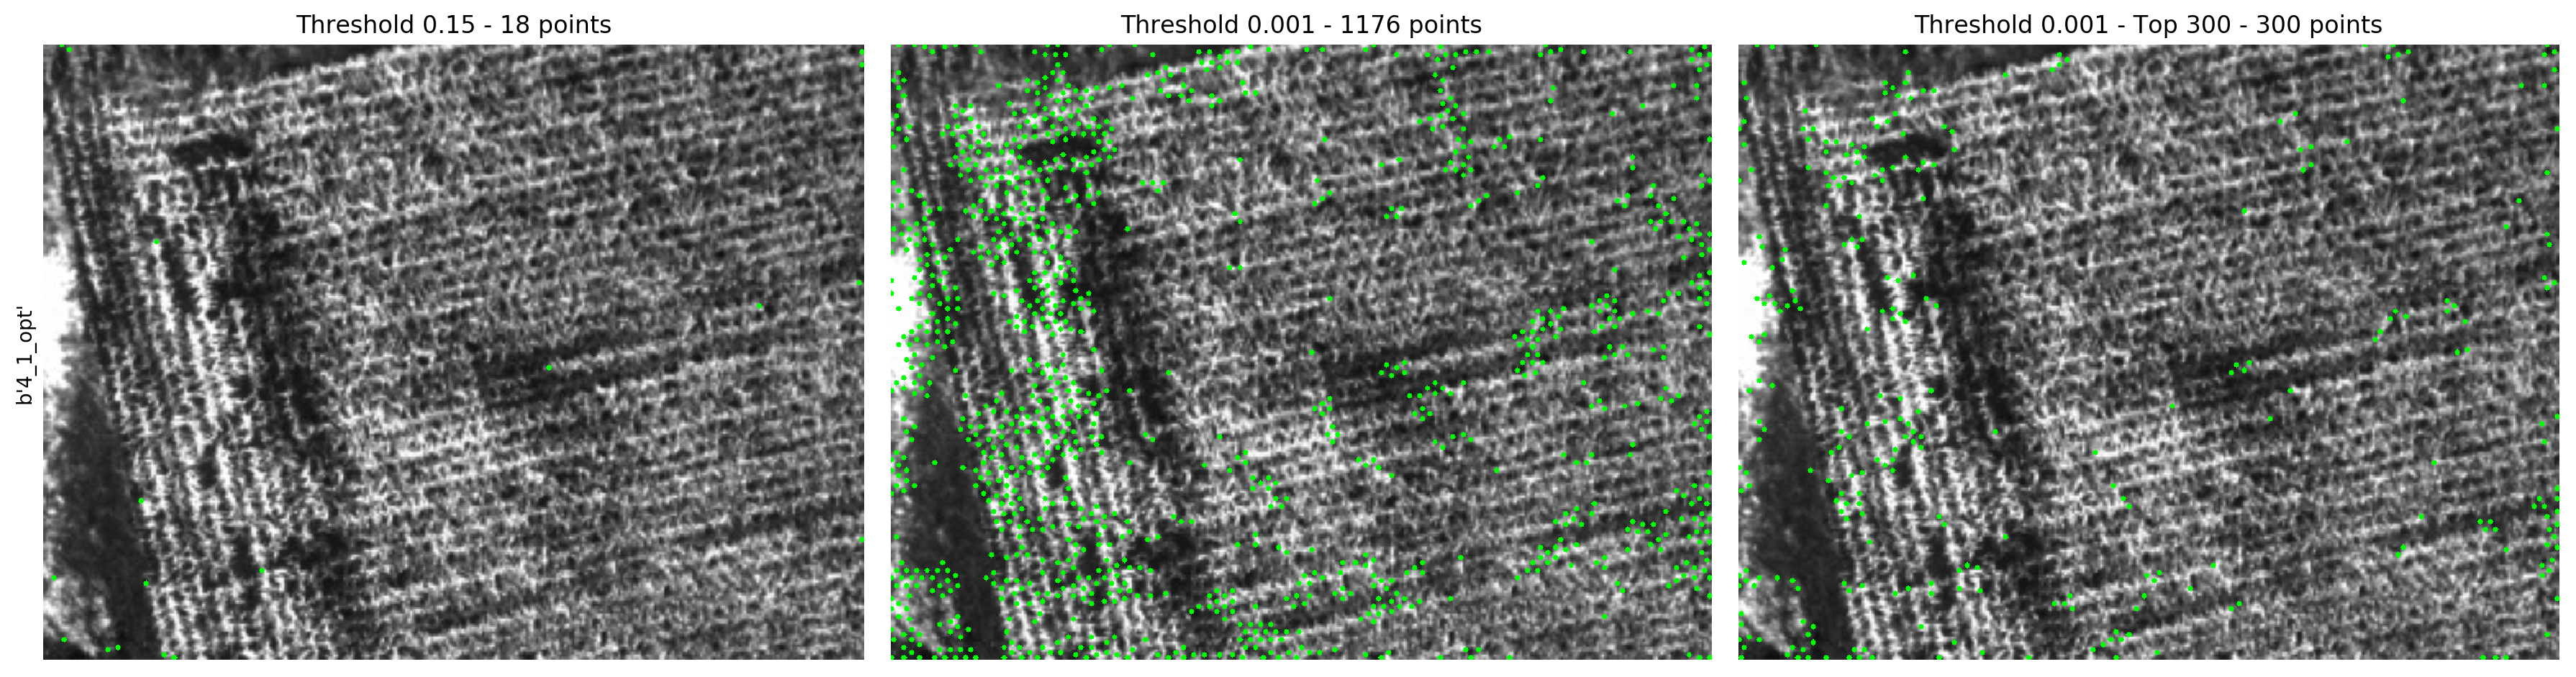

In [7]:
list_images = [b'4_1_opt', b'4_1_ir']
num_images = len(list_images)*len(experiments)
while num_images > 0:
    images, titles = [], []
    for n, e, data in zip(names, experiments, datasets):
        d = next(data)
        
        if d['name'] in list_images:
            print(d['name'])  
            images.append(draw_keypoints(d['image'], np.where(d['keypoint_map']))/255.)
            titles.append('{} - {} points'.format(n, len(d['keypoints'])))
            num_images -= 1
    if len(images) > 0:
        plot_imgs(images, titles=titles, ylabel=d['name'], dpi=200, cmap='gray')